# Fundamentals of Data Analysis (52446) Project 2020
***
This project has been created and maintained by Keith Ryan - G00387816@gmit.ie
***
Using Linear Regression I am to determine the power output from a wind turbine based on wind speed, the goal of this is not to simply use scikit's LinearRegression function to simply put a straight line on a plot. While it certainly will be doing that the challenge (and learning opportunity), is to determine how good of a fit the line is and can we improve upon it to be (reasonably) certain we have the best fit.

I will be comparing the line of fit and how good it is vs. the numpy polyfit equivalent.

In [38]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import sklearn.model_selection as mod
import numpy as np

### Inspecting the csv

In [39]:
powerprod_df = pd.read_csv('..\data\powerproduction.csv')
powerprod_df.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


In [40]:
powerprod_df.head()

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0


In [41]:
powerprod_df.tail()

,speed,power
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0
499,25.000,0.0


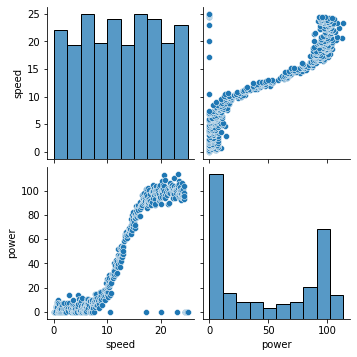

In [42]:
seaborn.pairplot(powerprod_df);

From the pairplot we can see that the shape of power v speed plot is not exactly linear and flattens at low speeds (<10) and high speeds (>20).

Additionally there are a few outlier values which don't really make sense and might hint at a problem with measurement or some other error, this is most noticeable for a few cases where speed is greater than 10 but the power is still at 0.
Unsure at this point whether these values should be included in the model as these values are probably mistakes.
***
Please note if using an older version of numpy trying the next cell upon first running polyfit it creates an error around converging of least squares, this error can be circumvented by re-executing the cell.
***

Line of fit equation:  
4.918 x - 13.9

Slope: 4.917595665404671
Intercept: -13.89990263051961
Numpy polyfit r squared: 0.7289360258564072
Numpy polyfit mean squared error: 468.4823283064244


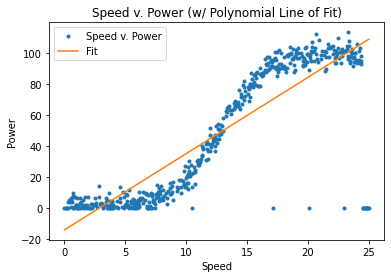

In [43]:
from sklearn.metrics import r2_score, mean_squared_error #importing these functions to score numpys polyfit and later sklearn LinearRegression

#for convenience turning df columns into np arrays for x and y
x=np.array(powerprod_df['speed'])
y=np.array(powerprod_df['power'])
plt.plot(x, y, '.', label='Speed v. Power') #make simple x y dot plot
#label x and y axis
plt.xlabel('Speed')
plt.ylabel('Power')
#get coefficients for speed versus power, to use to give simple line of fit, pre-linear regression (as shown in Ian's video on Fitting Lines)
a,b = np.polyfit(x, y, 1) #thought it would be neater to explicitly set a and b instead of using coeffs

#getting predict and rsquared taken form article: https://data36.com/linear-regression-in-python-numpy-polyfit/
predict = np.poly1d([a,b]) #predict holds an object that represents equation for the line of fit
print('Line of fit equation:', predict)

np_polyfit_r_sq = r2_score(y, predict(x)) #np_polyfit_score holds r squared of the model, in this case it's comparing the correct y values against the predicted values from the above predict equation
np_polyfit_m_sq = mean_squared_error(y_true=y, y_pred=predict(x))
print('\nSlope:',a)
print('Intercept:',b)
print('Numpy polyfit r squared:', np_polyfit_r_sq)
print('Numpy polyfit mean squared error:', np_polyfit_m_sq)

#Plot the straight line, here I am using np.unique(x) to make more robust in case there were mutltiple x values as otherwise would not get straight line
#for y arg using the standard 'a*x+b' format as we got our a and b coefficients from polyfit
plt.plot(np.unique(x), a*np.unique(x)+b, label='Fit')
plt.title('Speed v. Power (w/ Polynomial Line of Fit)')

plt.legend();

Using polyfit prior to the Linear Regression I was able to get a line of fit and have a score for it, next I will look at doing the same using sklearn's LinearRegression function and will compare the r squared of both.
***
## Sklearn's LinearRegression
[Documentation for sklearn LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

[Reshaping Dataframe columns to fit in model](https://realpython.com/linear-regression-in-python/)

In [44]:
#Trying a simple Linear regression without splitting dataset first, to compare with polyfit predictions
#Using this realpython article as a reference https://realpython.com/linear-regression-in-python/
X = powerprod_df['speed'].values.reshape(-1,1) #need to convert speed column into a 2d numpy array, e.g. 1 column many rows
y = powerprod_df['power'].values.reshape(-1,1)

#create object for model by fitting model to data
reg = LinearRegression().fit(X, y)
r_sq = reg.score(X, y) #r_sq (r squared) is the score of the model to show how much prediction error there is https://www.khanacademy.org/math/ap-statistics/bivariate-data-ap/assessing-fit-least-squares-regression/a/r-squared-intuition
m_sq = mean_squared_error(y_true=y, y_pred=predict(x))
print("r squared for generated model:", r_sq)
print('mean squared error for generated model:', m_sq)
print("models intercept:", reg.intercept_) #where line intercepts y axis
print("models slope:", reg.coef_) #coef_ returns a 1d array as only 1 target supplied e.g. speed


r squared for generated model: 0.7289360258564072
mean squared error for generated model: 468.4823283064244
models intercept: [-13.89990263]
models slope: [[4.91759567]]


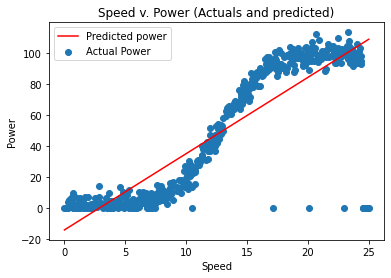

In [45]:
#Plotting linear regression model predicted values vs. the actuals
plt.scatter(powerprod_df['speed'],powerprod_df['power'], label='Actual Power')
plt.plot(X, reg.predict(X), 'red', label='Predicted power') #here I use predicted values from the model
plt.title('Speed v. Power (Actuals and predicted)')
#label x and y axis
plt.xlabel('Speed')
plt.ylabel('Power')
plt.legend()
plt.show();

***
### Comparing r squared and coefficients from numpy polyfit and sklearn LinearRegression

Below is printed the scores for the r squared and coefficients, we can see here that they actually match up exactly (with some rounding differences for slope and intercept).

In [46]:
print('numpy polyfit:')
print('r squared:',np_polyfit_r_sq)
print('mean squared error:', np_polyfit_m_sq)
print('slope:', a)
print('intercept:', b)


print('\nsklearn:')
print('r squared:', r_sq)
print('mean squared error:', m_sq)
print('slope:',reg.coef_)
print('intercept:', reg.intercept_)


numpy polyfit:
r squared: 0.7289360258564072
mean squared error: 468.4823283064244
slope: 4.917595665404671
intercept: -13.89990263051961

sklearn:
r squared: 0.7289360258564072
mean squared error: 468.4823283064244
slope: [[4.91759567]]
intercept: [-13.89990263]



After this first rough pass at Linear Regression of the windmill data we can see that the line is ok overall, it matches the general shape of the data, but looks like it has a low degree of accuracy for many of the points and seems to give an accurate representation for only the areas where the line intersects the scatter groups.

This line is also probably being skewed by the outlier values of 0 power at higher speeds (and possibly at low speeds too).
***
## Splitting the dataset to train the Linear Regression model
For next steps I am going to split the dataset up and use the resultant training and testing datasets to create a new model on a subset of the original data (the training dataset) and test it with the remaining unused data (the testing dataset).

I will be setting the size of the test dataset to be 33% of the original dataset which will leave us with 66% to train/fit the model with.

In [47]:
X = powerprod_df['speed'].values.reshape(-1,1)
y = powerprod_df['power'].values.reshape(-1,1)
#using train_test_split to split out my dataset to training and testing
X_train, X_test, y_train, y_test = mod.train_test_split(
    X, y, test_size=0.33, random_state=42) 
#random_state is set arbitrarily to 42, I want a consistent output here for the notebook as I will be making observations on the figures that may not be true depending on how dataset is split

In [48]:
#use training data to fit the model
reg_train = LinearRegression().fit(X_train, y_train)

#get predictions for y using the test data
y_pred = reg_train.predict(X_test)

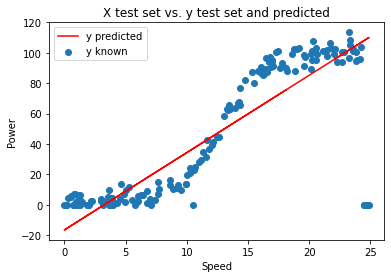

In [49]:
#plot the test data for X vs the test data for y 
#overlay the test data for X vs the predicted data for y
plt.scatter(X_test,y_test, label='y known')
plt.plot(X_test, y_pred, label='y predicted', color='red')
plt.title('X test set vs. y test set and predicted')
#label x and y axis
plt.xlabel('Speed')
plt.ylabel('Power')
plt.legend()
plt.show()

In [50]:
r_sq = reg_train.score(X_test, y_test)
print("r squared for generated model:", r_sq)
print("mean squared error for generated model:",mean_squared_error(y_true=y_test,y_pred=y_pred))
print("models intercept:", reg_train.intercept_)
print("models slope:", reg_train.coef_)

r squared for generated model: 0.6950401996553021
mean squared error for generated model: 559.0055059430915
models intercept: [-16.47804425]
models slope: [[5.0857491]]


We can see this model doesn't perform quite as well as the first one but this makes sense as it is missing around 30% of the overall points, next steps will be to start validating this model and seeing what improvements can be made

We have a pretty good r squared value above of greater than 60% which indicates that we have a pretty good fit and are not overfitting, however it is strange how large the mean squared error is at this point, I would have expected it to be significantly smaller and am not sure as to why it is so large, perhaps this is due to having many negative values due to the y intercept.
***

## Attempting to improve the model
In an effort to improve the model I am going to clean up the original dataframe and eliminate instances where there is a value greater than 0 for speed and equal to 0 for power. My reasoning behind this is that firstly if the wind turbine isn't moving (e.g. 0 speed) then it won't be generating any power, secondly I am assuming when you have a speed > 0 then it should be generating some power.

This is not necessarily the best idea as in practice (and maybe a specialist in Wind Turbines could specify why) you may see 0 power generated at different speeds, in this case I specifically wanted to omit 0 values for power generated in the middle of the dataframe.

In the next cell I show all rows with 0 power to show some of the rows that will be removed in the cleaned dataframe.

In [51]:
cleaned_df = powerprod_df #assign existing dataframe to new variable to be cleaned up
cleaned_df[cleaned_df['power']==0]

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
15,0.726,0.0
16,0.751,0.0
24,1.026,0.0
26,1.076,0.0
31,1.301,0.0


In [52]:
#remove rows where power is greater than 0 OR speed is equal to 0
#cleaned_df = cleaned_df[(cleaned_df['power'] != 0) | (cleaned_df['speed'] == 0.0) | (cleaned_df['speed'] >= 24.499) | (cleaned_df['speed'] <= 0.275)] 
cleaned_df = cleaned_df[(cleaned_df['power'] != 0) | (cleaned_df['speed'] == 0.0)] 

cleaned_df

,speed,power
0,0.000,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
...,...,...
485,24.249,103.700
486,24.299,93.694
487,24.349,93.078
488,24.374,98.223


In [53]:
#show summary of new cleaned dataframe
cleaned_df.describe()

,speed,power
count,452.000000,452.000000
mean,12.975531,53.113478
std,6.855738,40.554469
min,0.000000,0.000000
25%,7.294500,8.412750
50%,13.013000,56.123500
75%,18.775250,94.698250
max,24.399000,113.556000


In [54]:
#Quick check to make sure only 0 rows with 0 power were removed
print(powerprod_df['power'].sum())
print(cleaned_df['power'].sum())

24007.291999999998
24007.291999999998


In [55]:
#Reshape cleaned dataframe into X and y
X = cleaned_df['speed'].values.reshape(-1,1)
y = cleaned_df['power'].values.reshape(-1,1)
#using train_test_split to split out my dataset to training and testing, sticking with test size of 33% of values
X_train, X_test, y_train, y_test = mod.train_test_split(
    X, y, test_size=0.33, random_state=42)
#use training data to fit the model
reg_train = LinearRegression().fit(X_train, y_train)
#get predictions for y using the test data
y_pred = reg_train.predict(X_test)

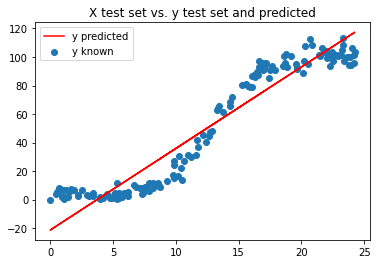

In [56]:
#plot the test data for X vs the test data for y 
#overlay the test data for X vs the predicted data for y
plt.scatter(X_test,y_test, label='y known')
plt.plot(X_test, y_pred, label='y predicted', color='red')
plt.title('X test set vs. y test set and predicted')
plt.legend()
plt.show()

In [57]:
r_sq = reg_train.score(X_test, y_test)

print("r squared for generated model:", r_sq)
print("mean squared error:", mean_squared_error(y_true=y_test,y_pred=y_pred))
print("models intercept:", reg_train.intercept_)
print("models slope:", reg_train.coef_)

r squared for generated model: 0.9065315848026159
mean squared error: 170.10248213054675
models intercept: [-21.29091501]
models slope: [[5.71769211]]


By cleaning up the data and removing outliers (where power is 0 and there is a value greater than 0 for speed), I have significantly increased the r_squared by nearly 20 percent, making it now approximately 90%.

The mean squared error has also significantly reduced from what it formerly was when there was no outlier data removed, however while these figures are better that does not necessarily mean that it was sensible to remove all the points that were as some of those may be genuine valuable information and weren't caused by some instrumentation error.
***

## Function for performing Linear Regression

In [58]:
def poly_lin_regression(X,y):
    '''
        poly_lin_regression takes in dataframe columns for X and y arguments, 
        returns poly1d object that acts as equation of the line
    '''
    #for convenience turning df columns into np arrays for x and y
    X=np.array(X)
    y=np.array(y)
    
    #get coefficients for speed versus power, to use to give simple line of fit, pre-linear regression (as shown in Ian's video on Fitting Lines)
    a,b = np.polyfit(X, y, 1) #thought it would be neater to explicitly set a and b instead of using coeffs

    #getting predict and rsquared taken form article: https://data36.com/linear-regression-in-python-numpy-polyfit/
    predict = np.poly1d([a,b]) #predict holds an object that represents equation for the line of fit
    return predict

In [59]:
def sklearn_lin_regression(X,y):
    #Reshape cleaned dataframe into X and y
    X = X.values.reshape(-1,1)
    y = y.values.reshape(-1,1)
    #using train_test_split to split out my dataset to training and testing, sticking with test size of 33% of values
    X_train, X_test, y_train, y_test = mod.train_test_split(
        X, y, test_size=0.33, random_state=42)
    #use training data to fit the model
    reg_train = LinearRegression().fit(X_train, y_train)
    return reg_train, X_train, X_test, y_train, y_test

In [60]:
#assign x,y values to be passed into poly_lin_regression function
x=powerprod_df['speed']
y=powerprod_df['power']
poly_lin_reg = poly_lin_regression(x,y)

#supplying value to poly_lin_reg we can get estimation for value
print(poly_lin_reg([1,2,3,4,5,6,7,8,9]))

[-8.98230697 -4.0647113   0.85288437  5.77048003 10.6880757  15.60567136
 20.52326703 25.44086269 30.35845836]


In [61]:
#sklearn_lin_regression returns a few variables so have multiple assigned to it
lin_reg_model, X_train, X_test, y_train, y_test = sklearn_lin_regression(powerprod_df['speed'], powerprod_df['power'])
#predict values with returned lin_reg_model object and X_test array
print(lin_reg_model.predict(X_test))
#get score for model
print(lin_reg_model.score(X_test,y_test))

[[ 75.53841416]
 [  2.74100159]
 [ 78.97638055]
 [ 22.72290979]
 [ 11.52409028]
 [ 83.68578421]
 [ 79.48495546]
 [ 15.21125838]
 [  1.8509955 ]
 [ 98.83114503]
 [-13.80294022]
 [ 34.30316048]
 [ 85.97437131]
 [  6.56039916]
 [ 78.21351819]
 [ 82.92292185]
 [109.52138963]
 [ -9.9886284 ]
 [ 65.22960074]
 [ 86.35580249]
 [108.11772288]
 [108.24995235]
 [ 56.44651205]
 [ 74.13983316]
 [  3.37672023]
 [101.88259448]
 [110.02996454]
 [ 37.99541433]
 [ 10.50185471]
 [ 69.81186068]
 [104.55769851]
 [ 70.06614813]
 [ 96.66461591]
 [ 27.55945718]
 [-15.71518188]
 [ 69.68471695]
 [ 86.61008995]
 [  2.23242668]
 [ 37.23255196]
 [  0.82875993]
 [ 81.01068019]
 [  8.84898625]
 [106.8462856 ]
 [ 32.14171712]
 [ -9.22576604]
 [  3.50386395]
 [-16.47804425]
 [-13.54865277]
 [ 88.14090042]
 [-11.51435313]
 [  2.48671413]
 [ 30.8651941 ]
 [ 17.75921867]
 [ 86.73723367]
 [ 34.17601676]
 [ -1.45982716]
 [ 21.19209931]
 [-12.27721549]
 [ 35.82888521]
 [  3.63100768]
 [109.3942459 ]
 [ 50.97424602]
 [ 67.26

***
## Conclusion and Summary
With this project I have tried out various different ways of using Linear Regression to get a line of fit for a dataset, I first explored using numpy.polyfit as shown by Ian in the lectures and following on from that used sklearn's LinearRegression function to perform the same, then comparing the two saw that there was really no difference in their outputs for the r squared, mean squared error or coefficients.

Due to the relative straightforwardness and ease of sklearn, I stuck with that for the remainder of the notebook and tried out a few extra approaches, in one I split the data into testing and training to give a way of training up the Linear Regression model on a incomplete dataset and then testing the accuracy of it with the remaining data.
In addition to that, I also looked at cleaning up the dataset in order to improve the r squared value, while it did improve the value the items removed from the dataset may not necessarily have been correct to do so, but I believe it at least shows the impact that removing outlier values can have on the accuracy of the fit of line.

Finally I encapsulated both the numpy polyfit and sklearn linear regression into their own functions.